In [136]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import math

number_of_agents = 100

def mc_mean_sd(df, first, last):
    data = df.loc[:, pd.IndexSlice[:, first:last]]
    mean_within_MC_steps = data.mean(axis=1, level=0)
    mean_across_MC_steps = mean_within_MC_steps.mean(axis=1)
    variance_across_MC_steps = mean_within_MC_steps.sub(mean_across_MC_steps, axis=0).pow(2).mean(axis=1)
    sd_across_MC_steps = np.sqrt(variance_across_MC_steps)
    return mean_across_MC_steps, sd_across_MC_steps

## Evolutionary 

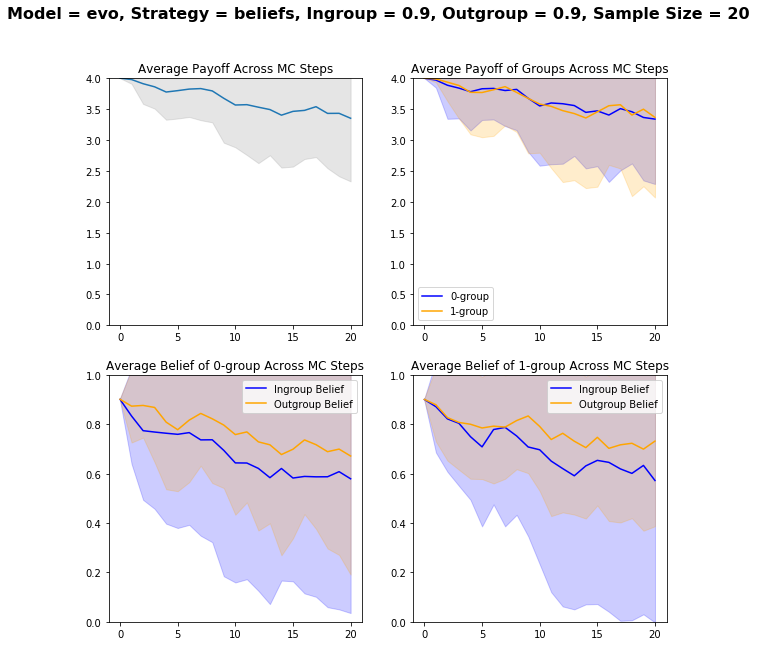

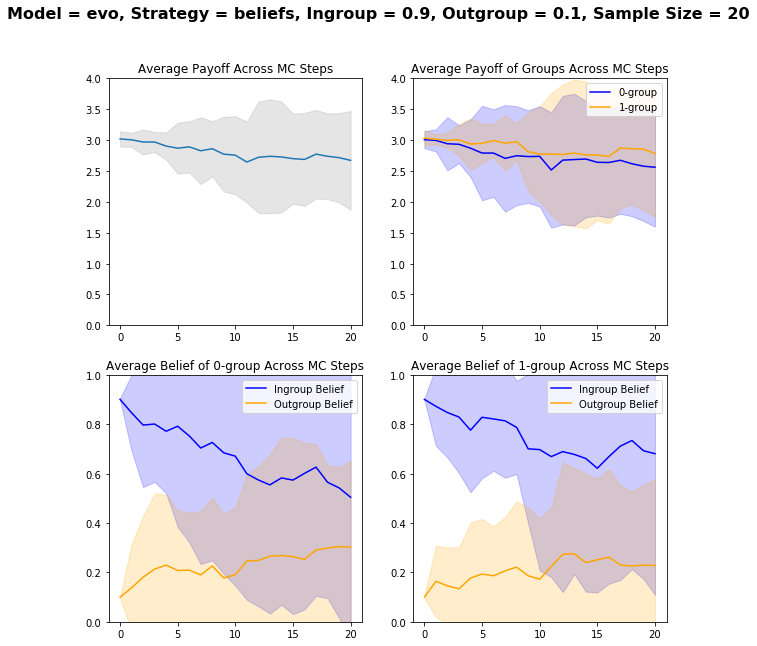

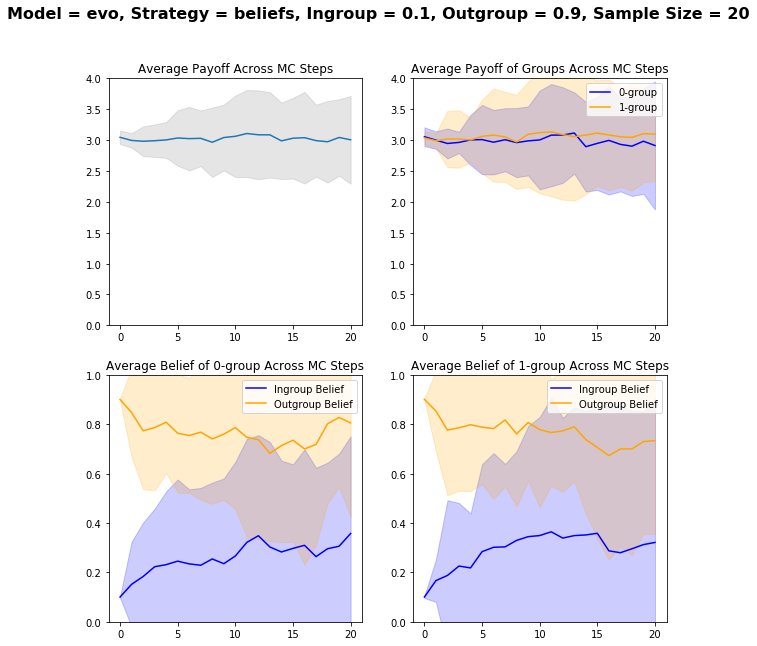

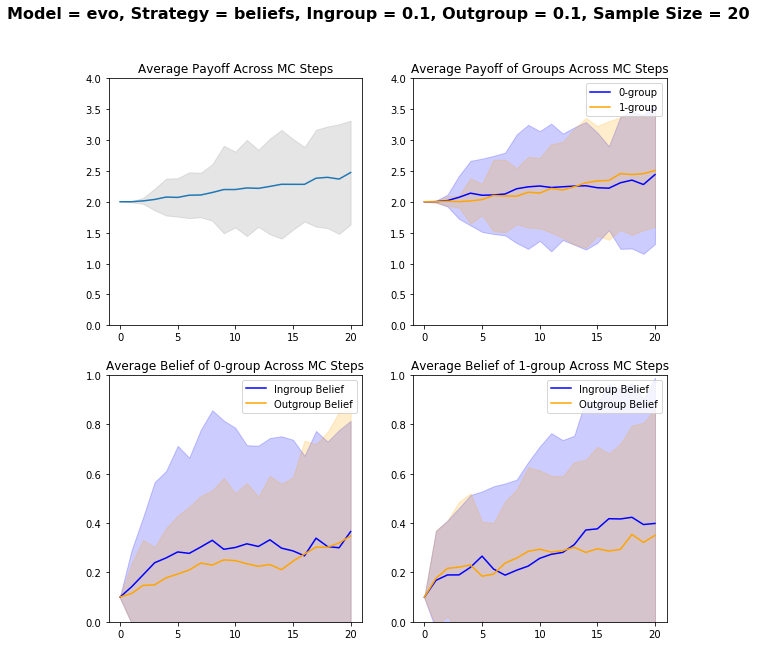

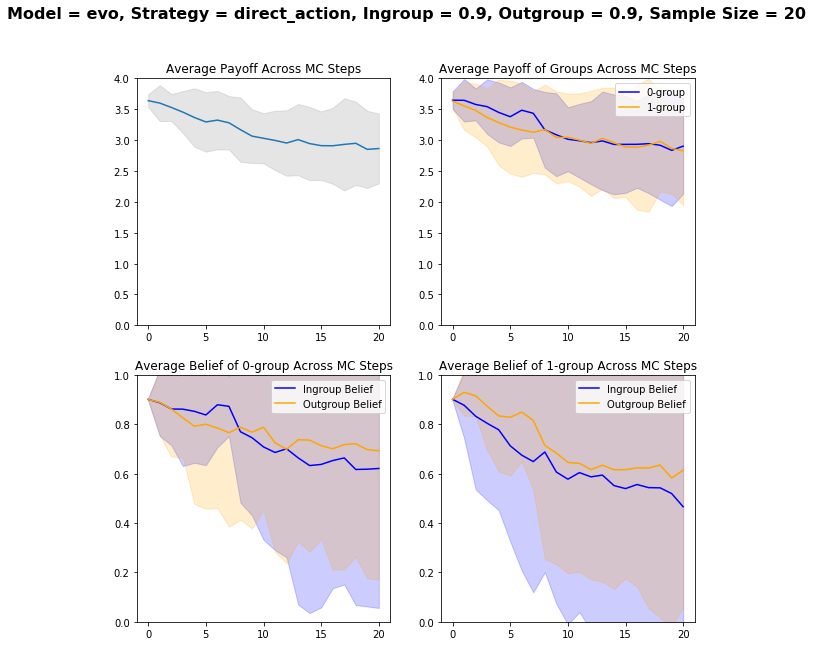

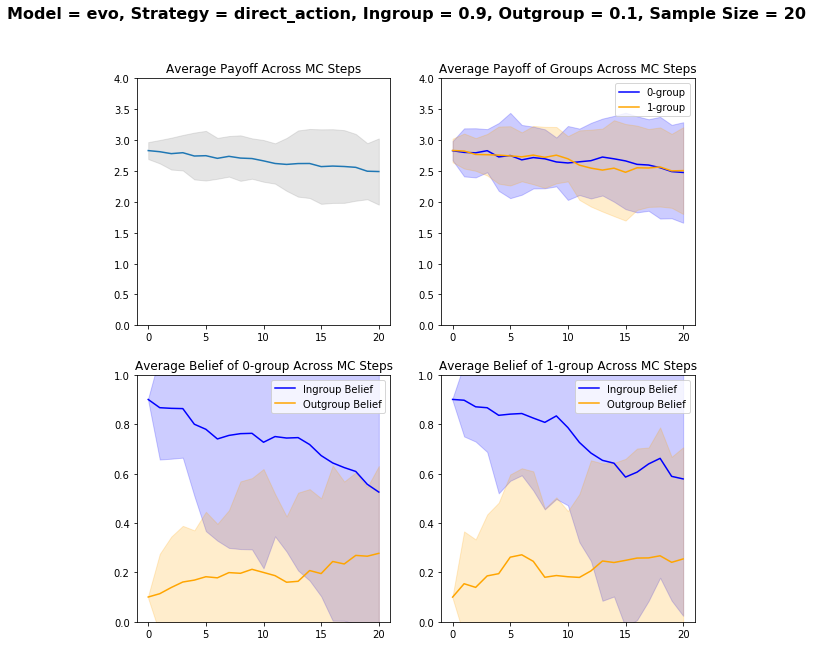

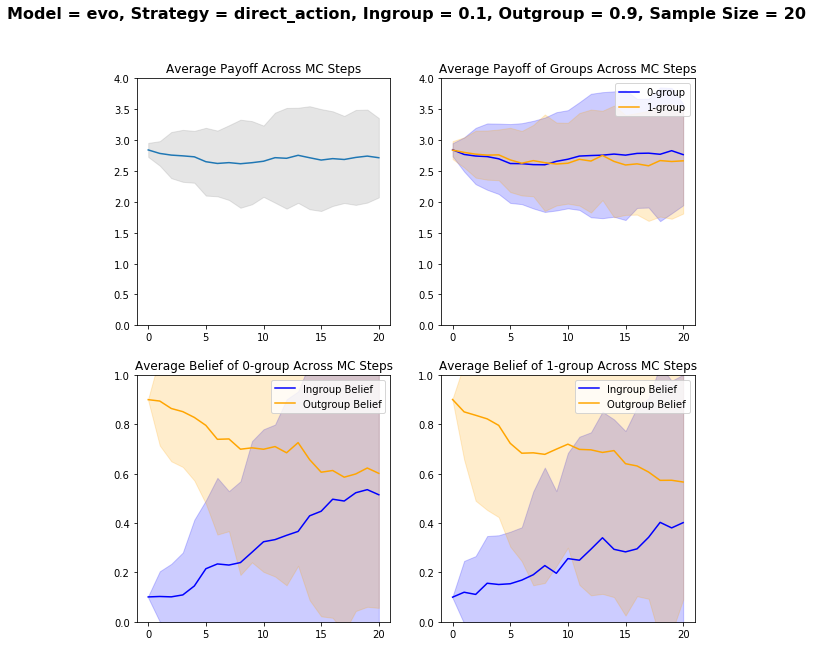

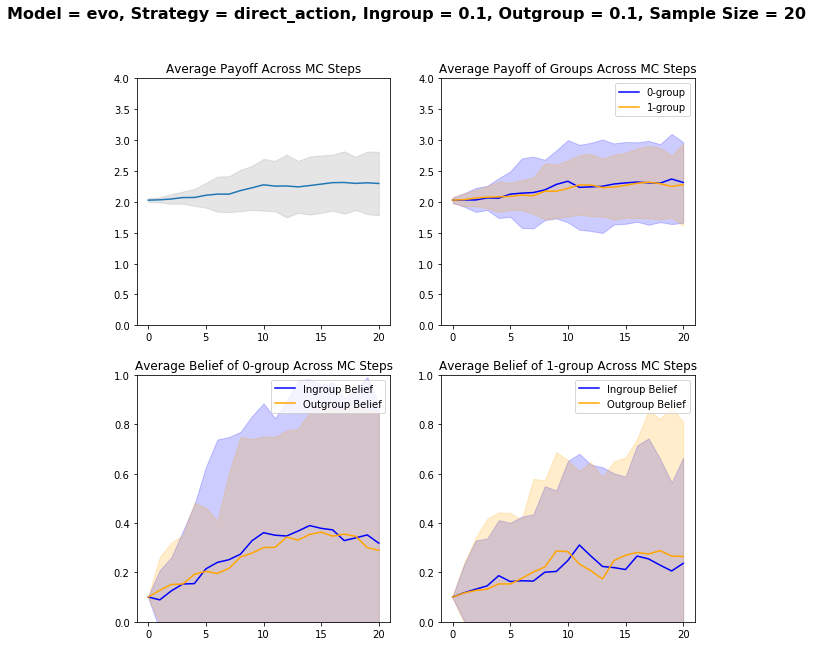

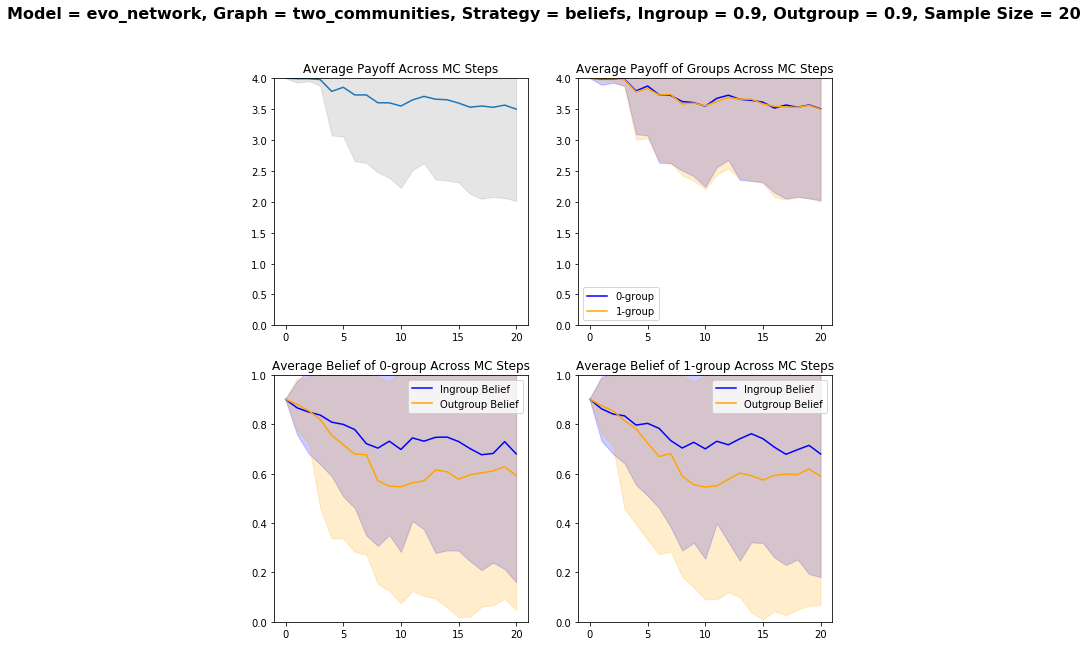

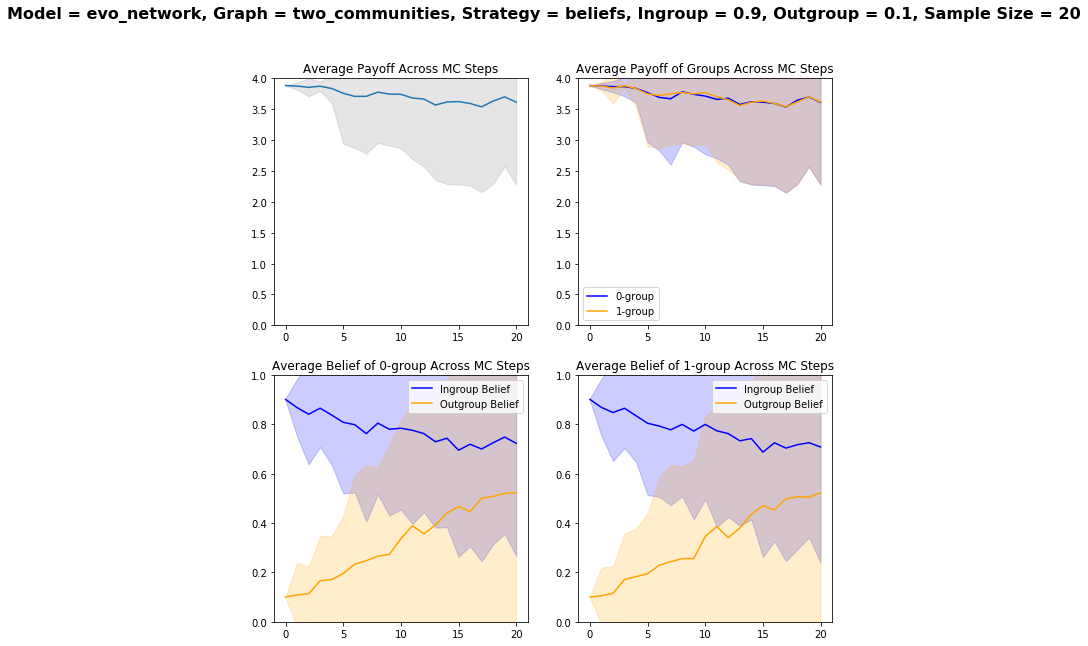

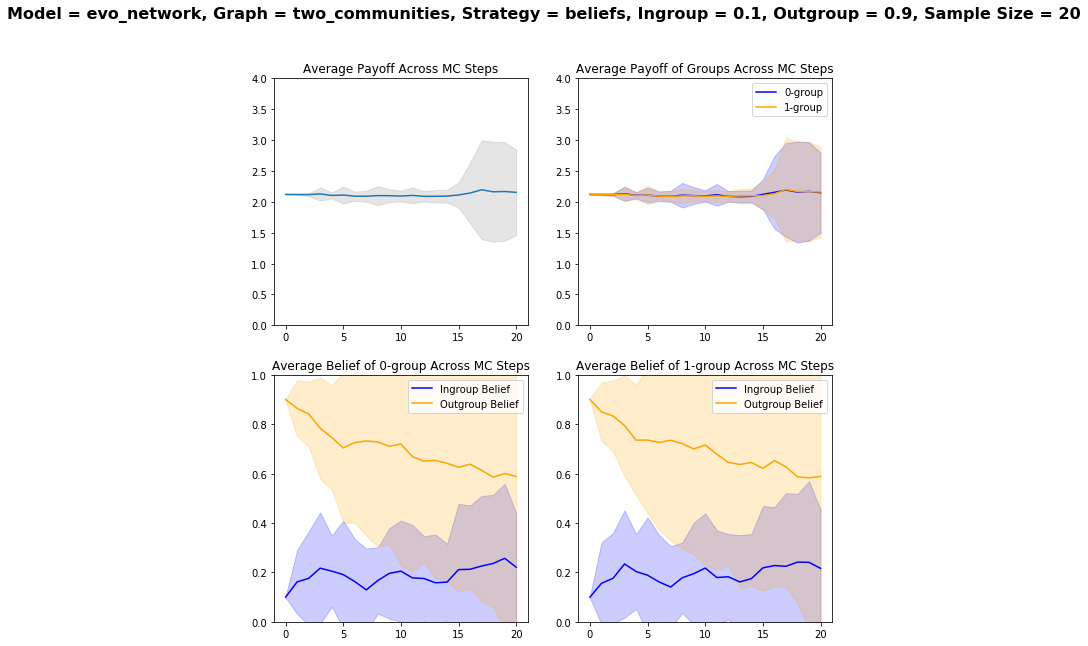

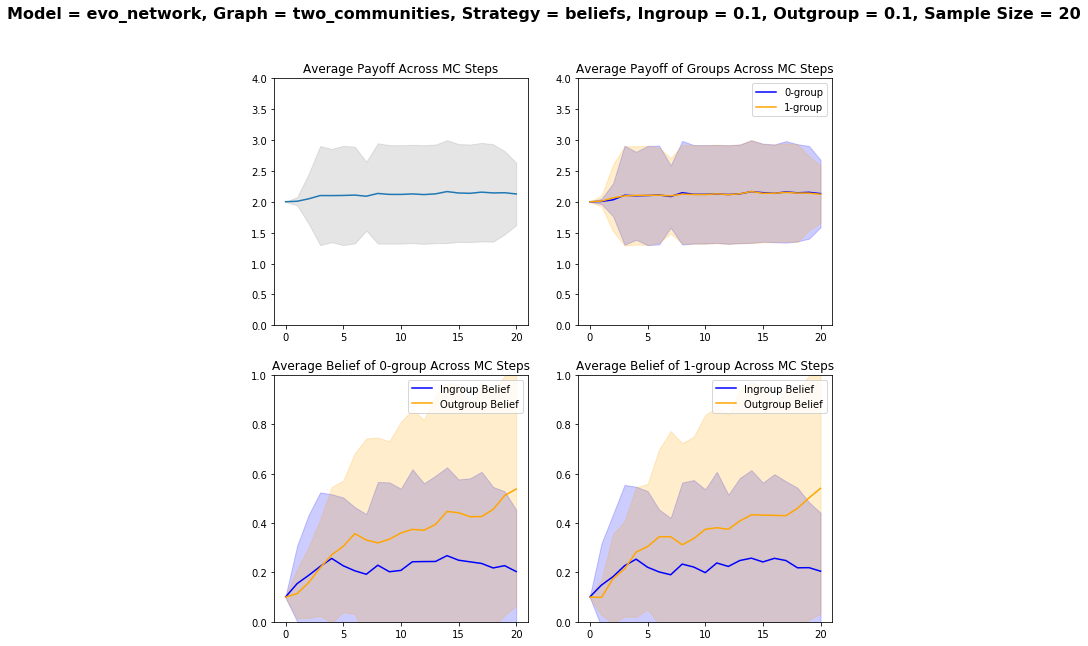

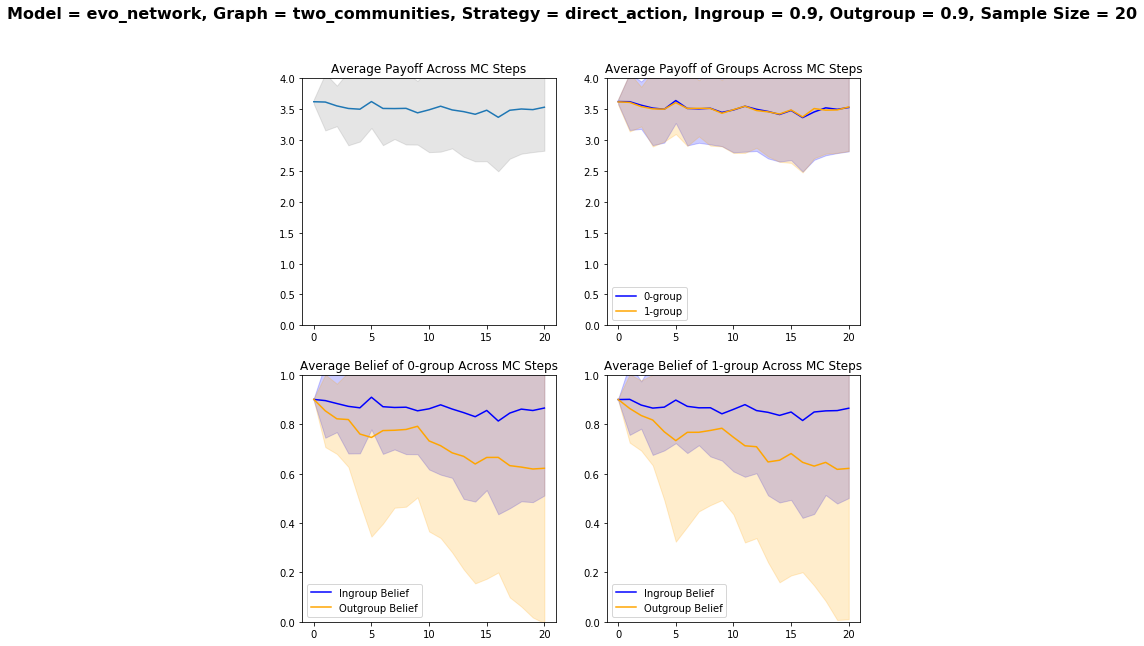

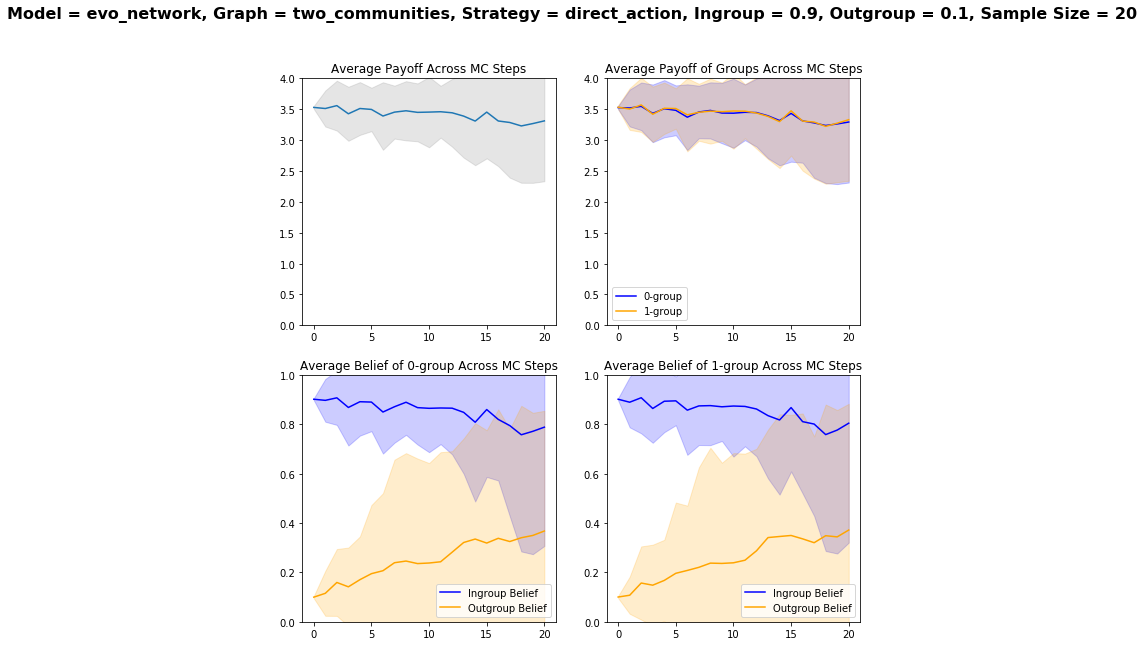

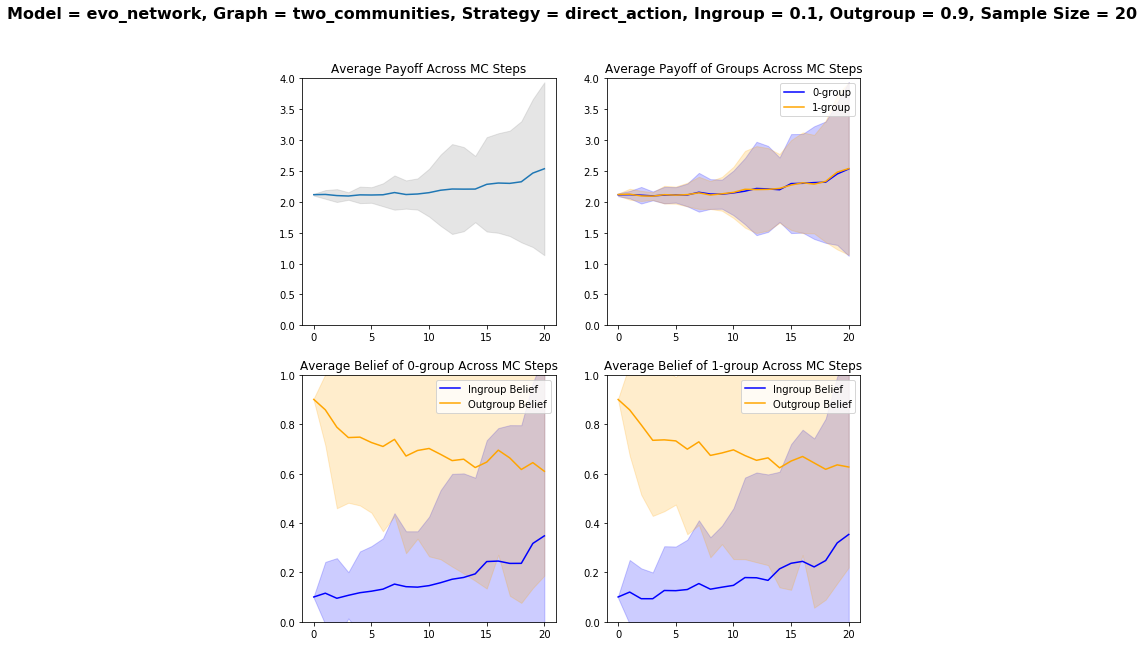

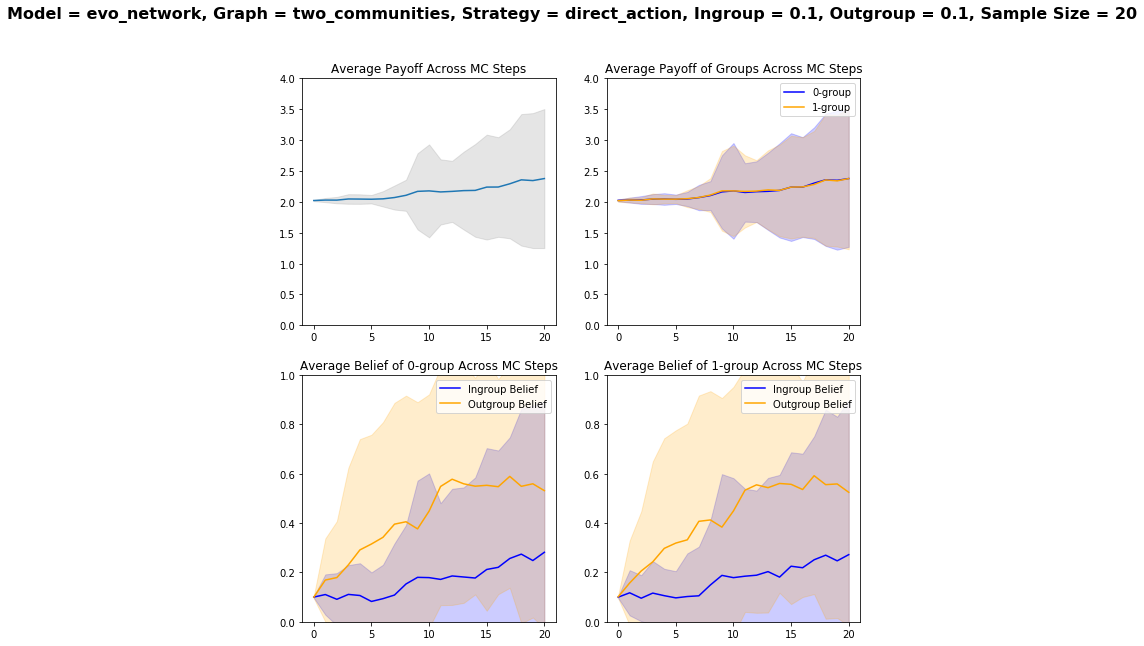

In [199]:
# Create graphs for all conditions
beliefs = [0.9,0.1]
choose_strategies = ['beliefs', 'direct_action']
graph_types = ['two_communities']
network_model_types = ['evo_network']
non_network_model_types = ['evo']
x = list(range(20))

for model_type in non_network_model_types:
    for choose_strategy in choose_strategies:
        for ingroup in beliefs:
            for outgroup in beliefs:
                dataList = []
                for datafile in glob.glob('results_139/model_{}_chooseStrategy_{}_payoffSep_small_ingroup_{}_outgroup_{}_*.csv'.format(model_type, choose_strategy, ingroup, outgroup)):
                    dataList.append(pd.read_csv(datafile))

                # Setup data frame, remove repeated timesteps and set timesteps as row names.
                df = pd.concat(dataList, axis=1, keys = range(len(dataList)))
                df.index = df.loc[:, pd.IndexSlice[2, 'T']]
                df = df.loc[:, pd.IndexSlice[:, 'P0':'O99']]
                df = df.rename_axis('T')
                
                mean_across_MC_steps_payoff, sd_across_MC_steps_payoff = mc_mean_sd(df, 'P0', 'P99')
                lower_bound_payoff = mean_across_MC_steps_payoff - 1.96*sd_across_MC_steps_payoff
                upper_bound_payoff = mean_across_MC_steps_payoff + 1.96*sd_across_MC_steps_payoff

                mean_across_MC_steps_0_payoff, sd_across_MC_steps_0_payoff = mc_mean_sd(df, 'P0', 'P49')
                lower_bound_payoff0 = mean_across_MC_steps_0_payoff - 1.96*sd_across_MC_steps_0_payoff
                upper_bound_payoff0 = mean_across_MC_steps_0_payoff + 1.96*sd_across_MC_steps_0_payoff
                mean_across_MC_steps_1_payoff, sd_across_MC_steps_1_payoff = mc_mean_sd(df, 'P50', 'P99')
                lower_bound_payoff1 = mean_across_MC_steps_1_payoff - 1.96*sd_across_MC_steps_1_payoff
                upper_bound_payoff1 = mean_across_MC_steps_1_payoff + 1.96*sd_across_MC_steps_1_payoff

                mean_across_MC_steps_0_ingroup, sd_across_MC_steps_0_ingroup = mc_mean_sd(df, 'I0', 'I49')
                lower_bound_ingroup0 = mean_across_MC_steps_0_ingroup - 1.96*sd_across_MC_steps_0_ingroup
                upper_bound_ingroup0 = mean_across_MC_steps_0_ingroup + 1.96*sd_across_MC_steps_0_ingroup
                
                mean_across_MC_steps_1_ingroup, sd_across_MC_steps_1_ingroup = mc_mean_sd(df, 'I50', 'I99')
                lower_bound_ingroup1 = mean_across_MC_steps_1_ingroup - 1.96*sd_across_MC_steps_1_ingroup
                upper_bound_ingroup1 = mean_across_MC_steps_1_ingroup + 1.96*sd_across_MC_steps_1_ingroup

                mean_across_MC_steps_0_outgroup, sd_across_MC_steps_0_outgroup = mc_mean_sd(df, 'O0', 'O49')
                lower_bound_outgroup0 = mean_across_MC_steps_0_outgroup - 1.96*sd_across_MC_steps_0_outgroup
                upper_bound_outgroup0 = mean_across_MC_steps_0_outgroup + 1.96*sd_across_MC_steps_0_outgroup
                mean_across_MC_steps_1_outgroup, sd_across_MC_steps_1_outgroup = mc_mean_sd(df, 'O50', 'O99')
                lower_bound_outgroup1 = mean_across_MC_steps_1_outgroup - 1.96*sd_across_MC_steps_1_outgroup
                upper_bound_outgroup1 = mean_across_MC_steps_1_outgroup + 1.96*sd_across_MC_steps_1_outgroup
                
                T = list(range(len(lower_bound_payoff)))
                
                fig, axs = plt.subplots(2, 2, figsize=(10,10))
                fig.suptitle("Model = {}, Strategy = {}, Ingroup = {}, Outgroup = {}, Sample Size = {}".format(model_type, choose_strategy, ingroup, outgroup, len(dataList)), fontsize=16, fontweight="bold")
                
                axs[0, 0].plot(T, mean_across_MC_steps_payoff)
                axs[0, 0].fill_between(T, lower_bound_payoff, upper_bound_payoff, color='gray', alpha=0.2)
                #axs[0, 0].set_xlabel("Simulation Time")
                #axs[0, 0].set_ylabel("Average Payoff")
                axs[0,0].set_ylim(0,4)
                axs[0, 0].set_title("Average Payoff Across MC Steps")
                
                axs[0, 1].plot(T, mean_across_MC_steps_0_payoff, label="0-group", color='blue')
                axs[0, 1].plot(T, mean_across_MC_steps_1_payoff, label="1-group", color='orange')
                axs[0, 1].fill_between(T, lower_bound_payoff0, upper_bound_payoff0, color='blue', alpha=0.2)
                axs[0, 1].fill_between(T, lower_bound_payoff1, upper_bound_payoff1, color='orange', alpha=0.2)
                #axs[0, 1].xlabel("Simulation Time")
                #axs[0, 1].ylabel("Average Payoff")
                axs[0, 1].set_title("Average Payoff of Groups Across MC Steps")
                axs[0, 1].set_ylim(0,4)
                axs[0, 1].legend()

                
                axs[1, 0].plot(T, mean_across_MC_steps_0_ingroup, label="Ingroup Belief", color='blue')
                axs[1, 0].plot(T, mean_across_MC_steps_0_outgroup, label="Outgroup Belief", color='orange')
                axs[1, 0].fill_between(T, lower_bound_ingroup0, upper_bound_ingroup0, color='blue', alpha=0.2)
                axs[1, 0].fill_between(T, lower_bound_outgroup0, upper_bound_outgroup0, color='orange', alpha=0.2)
                axs[1, 0].legend()
                #axs[1, 0].xlabel("Simulation Time")
                #axs[1, 0].ylabel("Average Belief")
                axs[1,0].set_ylim(0,1)
                axs[1, 0].set_title("Average Belief of 0-group Across MC Steps")

                axs[1, 1].plot(T, mean_across_MC_steps_1_ingroup, label="Ingroup Belief", color='blue')
                axs[1, 1].plot(T, mean_across_MC_steps_1_outgroup, label="Outgroup Belief", color='orange')
                axs[1, 1].fill_between(T, lower_bound_ingroup1, upper_bound_ingroup1, color='blue', alpha=0.2)
                axs[1, 1].fill_between(T, lower_bound_outgroup1, upper_bound_outgroup1, color='orange', alpha=0.2)
                axs[1, 1].legend()
                #axs[1, 1].xlabel("Simulation Time")
                #axs[1, 1].ylabel("Average Belief")
                axs[1,1].set_ylim(0,1)
                axs[1, 1].set_title("Average Belief of 1-group Across MC Steps")
                
                fig.savefig('model_{}_chooseStrategy_{}_payoffSep_small_ingroup_{}_outgroup_{}.png'.format(model_type, choose_strategy, ingroup, outgroup))

for model_type in network_model_types:
    for graph_type in graph_types:
        for choose_strategy in choose_strategies:
            for ingroup in beliefs:
                for outgroup in beliefs:
                    dataList = []
                    for datafile in glob.glob('results_139/model_{}_graph_{}_chooseStrategy_{}_payoffSep_small_ingroup_{}_outgroup_{}_*.csv'.format(model_type, graph_type, choose_strategy, ingroup, outgroup)):
                        dataList.append(pd.read_csv(datafile))
                    
                    # Setup data frame, remove repeated timesteps and set timesteps as row names.
                    df = pd.concat(dataList, axis=1, keys = range(len(dataList)))
                    df.index = df.loc[:, pd.IndexSlice[2, 'T']]
                    df = df.loc[:, pd.IndexSlice[:, 'P0':'O99']]
                    df = df.rename_axis('T')
                    

                    mean_across_MC_steps_payoff, sd_across_MC_steps_payoff = mc_mean_sd(df, 'P0', 'P99')
                    lower_bound_payoff = mean_across_MC_steps_payoff - 1.96*sd_across_MC_steps_payoff
                    upper_bound_payoff = mean_across_MC_steps_payoff + 1.96*sd_across_MC_steps_payoff

                    mean_across_MC_steps_0_payoff, sd_across_MC_steps_0_payoff = mc_mean_sd(df, 'P0', 'P49')
                    lower_bound_payoff0 = mean_across_MC_steps_0_payoff - 1.96*sd_across_MC_steps_0_payoff
                    upper_bound_payoff0 = mean_across_MC_steps_0_payoff + 1.96*sd_across_MC_steps_0_payoff
                    mean_across_MC_steps_1_payoff, sd_across_MC_steps_1_payoff = mc_mean_sd(df, 'P50', 'P99')
                    lower_bound_payoff1 = mean_across_MC_steps_1_payoff - 1.96*sd_across_MC_steps_1_payoff
                    upper_bound_payoff1 = mean_across_MC_steps_1_payoff + 1.96*sd_across_MC_steps_1_payoff

                    mean_across_MC_steps_0_ingroup, sd_across_MC_steps_0_ingroup = mc_mean_sd(df, 'I0', 'I49')
                    lower_bound_ingroup0 = mean_across_MC_steps_0_ingroup - 1.96*sd_across_MC_steps_0_ingroup
                    upper_bound_ingroup0 = mean_across_MC_steps_0_ingroup + 1.96*sd_across_MC_steps_0_ingroup

                    mean_across_MC_steps_1_ingroup, sd_across_MC_steps_1_ingroup = mc_mean_sd(df, 'I50', 'I99')
                    lower_bound_ingroup1 = mean_across_MC_steps_1_ingroup - 1.96*sd_across_MC_steps_1_ingroup
                    upper_bound_ingroup1 = mean_across_MC_steps_1_ingroup + 1.96*sd_across_MC_steps_1_ingroup

                    mean_across_MC_steps_0_outgroup, sd_across_MC_steps_0_outgroup = mc_mean_sd(df, 'O0', 'O49')
                    lower_bound_outgroup0 = mean_across_MC_steps_0_outgroup - 1.96*sd_across_MC_steps_0_outgroup
                    upper_bound_outgroup0 = mean_across_MC_steps_0_outgroup + 1.96*sd_across_MC_steps_0_outgroup
                    mean_across_MC_steps_1_outgroup, sd_across_MC_steps_1_outgroup = mc_mean_sd(df, 'O50', 'O99')
                    lower_bound_outgroup1 = mean_across_MC_steps_1_outgroup - 1.96*sd_across_MC_steps_1_outgroup
                    upper_bound_outgroup1 = mean_across_MC_steps_1_outgroup + 1.96*sd_across_MC_steps_1_outgroup

                    T = list(range(len(lower_bound_payoff)))

                    fig, axs = plt.subplots(2, 2, figsize=(10,10))
                    fig.suptitle("Model = {}, Graph = {}, Strategy = {}, Ingroup = {}, Outgroup = {}, Sample Size = {}".format(model_type, graph_type, choose_strategy, ingroup, outgroup, len(dataList)), fontsize=16, fontweight="bold")

                    axs[0, 0].plot(T, mean_across_MC_steps_payoff)
                    axs[0, 0].fill_between(T, lower_bound_payoff, upper_bound_payoff, color='gray', alpha=0.2)
                    #axs[0, 0].set_xlabel("Simulation Time")
                    #axs[0, 0].set_ylabel("Average Payoff")
                    axs[0,0].set_ylim(0,4)
                    axs[0, 0].set_title("Average Payoff Across MC Steps")

                    axs[0, 1].plot(T, mean_across_MC_steps_0_payoff, label="0-group", color='blue')
                    axs[0, 1].plot(T, mean_across_MC_steps_1_payoff, label="1-group", color='orange')
                    axs[0, 1].fill_between(T, lower_bound_payoff0, upper_bound_payoff0, color='blue', alpha=0.2)
                    axs[0, 1].fill_between(T, lower_bound_payoff1, upper_bound_payoff1, color='orange', alpha=0.2)
                    #axs[0, 1].xlabel("Simulation Time")
                    #axs[0, 1].ylabel("Average Payoff")
                    axs[0, 1].set_title("Average Payoff of Groups Across MC Steps")
                    axs[0, 1].set_ylim(0,4)
                    axs[0, 1].legend()


                    axs[1, 0].plot(T, mean_across_MC_steps_0_ingroup, label="Ingroup Belief", color='blue')
                    axs[1, 0].plot(T, mean_across_MC_steps_0_outgroup, label="Outgroup Belief", color='orange')
                    axs[1, 0].fill_between(T, lower_bound_ingroup0, upper_bound_ingroup0, color='blue', alpha=0.2)
                    axs[1, 0].fill_between(T, lower_bound_outgroup0, upper_bound_outgroup0, color='orange', alpha=0.2)
                    axs[1, 0].legend()
                    #axs[1, 0].xlabel("Simulation Time")
                    #axs[1, 0].ylabel("Average Belief")
                    axs[1,0].set_ylim(0,1)
                    axs[1, 0].set_title("Average Belief of 0-group Across MC Steps")

                    axs[1, 1].plot(T, mean_across_MC_steps_1_ingroup, label="Ingroup Belief", color='blue')
                    axs[1, 1].plot(T, mean_across_MC_steps_1_outgroup, label="Outgroup Belief", color='orange')
                    axs[1, 1].fill_between(T, lower_bound_ingroup1, upper_bound_ingroup1, color='blue', alpha=0.2)
                    axs[1, 1].fill_between(T, lower_bound_outgroup1, upper_bound_outgroup1, color='orange', alpha=0.2)
                    axs[1, 1].legend()
                    #axs[1, 1].xlabel("Simulation Time")
                    #axs[1, 1].ylabel("Average Belief")
                    axs[1,1].set_ylim(0,1)
                    axs[1, 1].set_title("Average Belief of 1-group Across MC Steps")
                    
                    fig.savefig('model_{}_graph_{}_chooseStrategy_{}_payoffSep_small_ingroup_{}_outgroup_{}.png'.format(model_type, graph_type, choose_strategy, ingroup, outgroup))
     

## RL

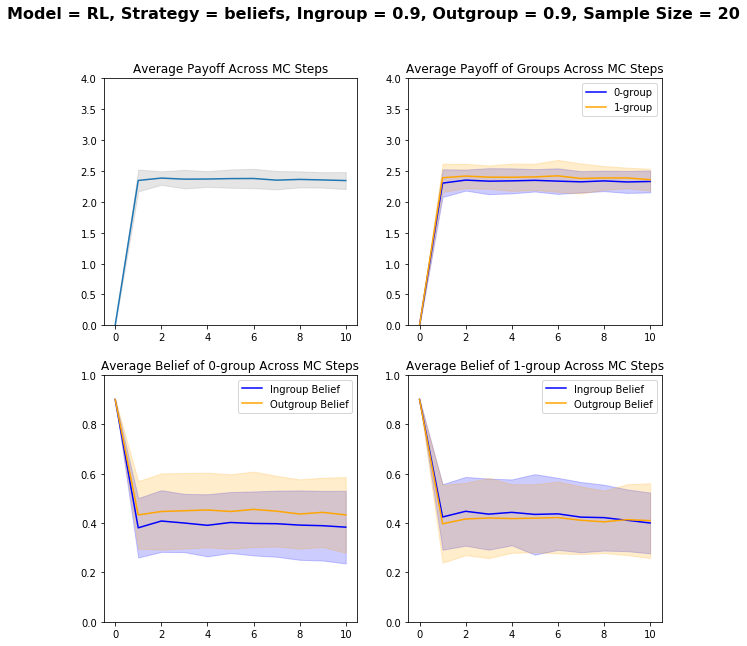

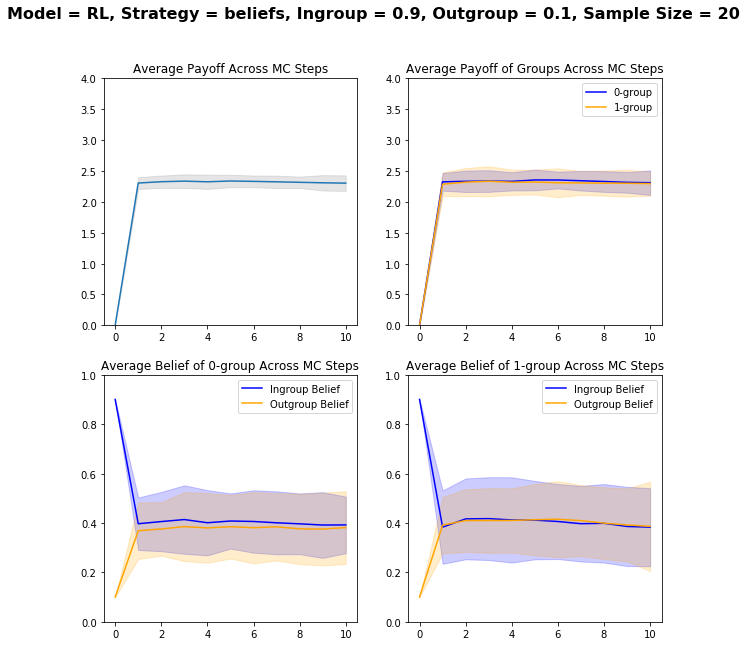

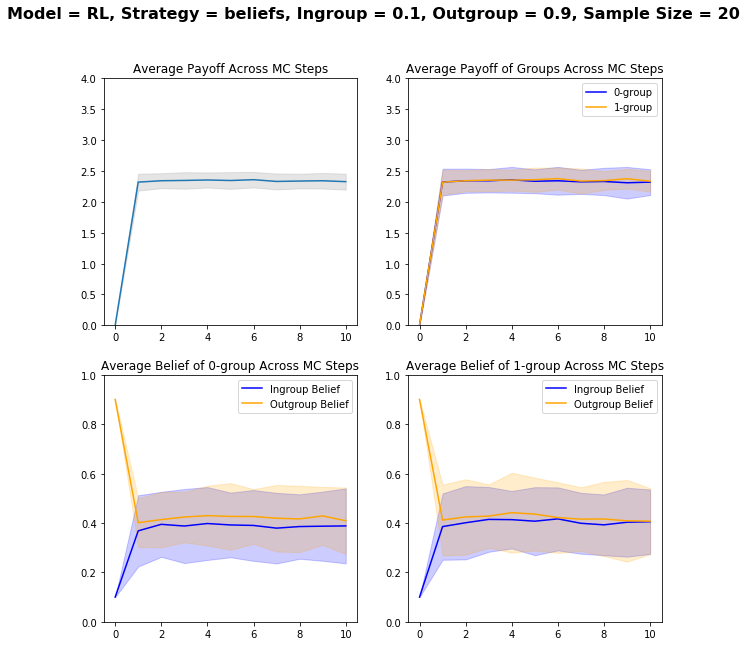

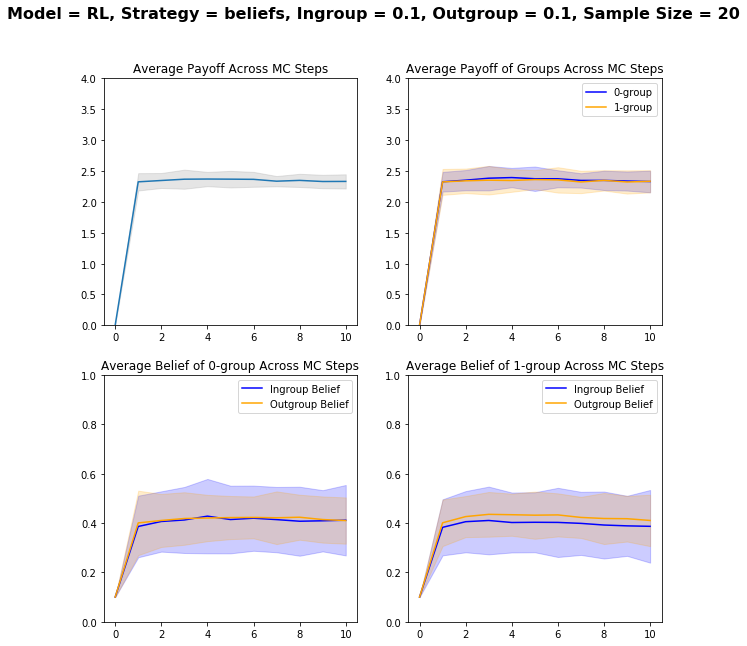

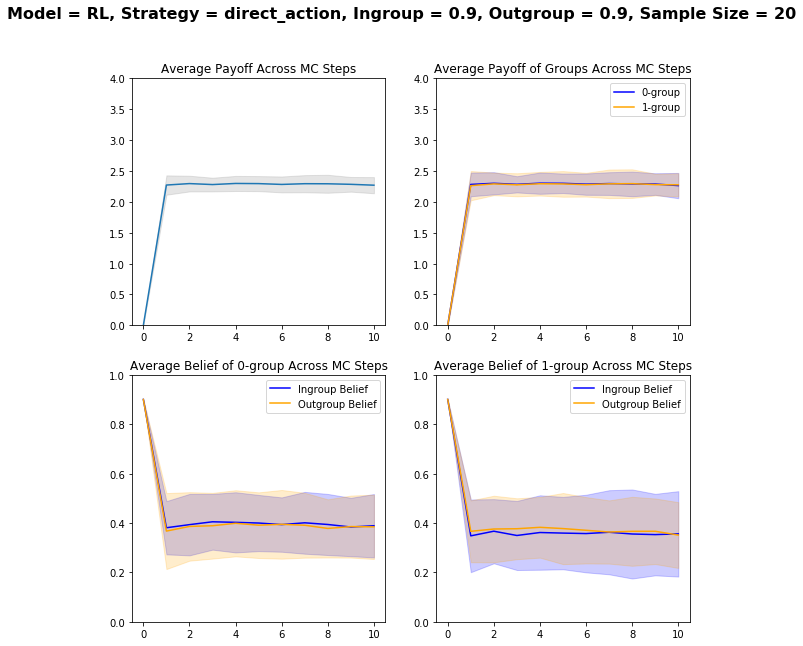

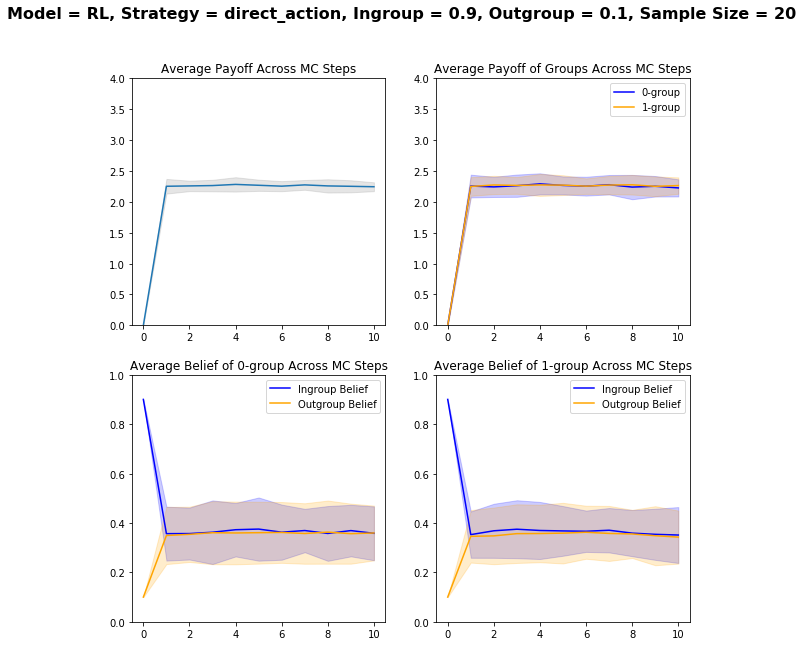

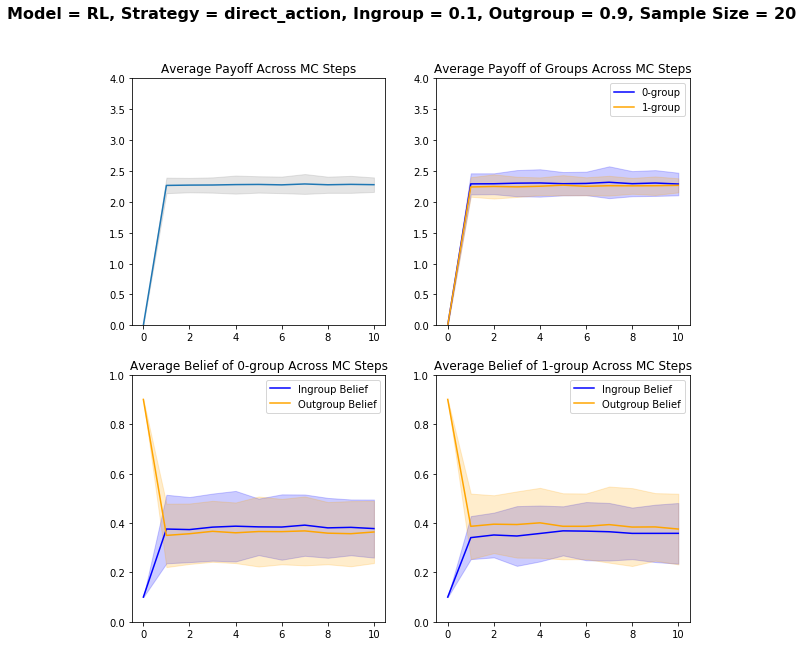

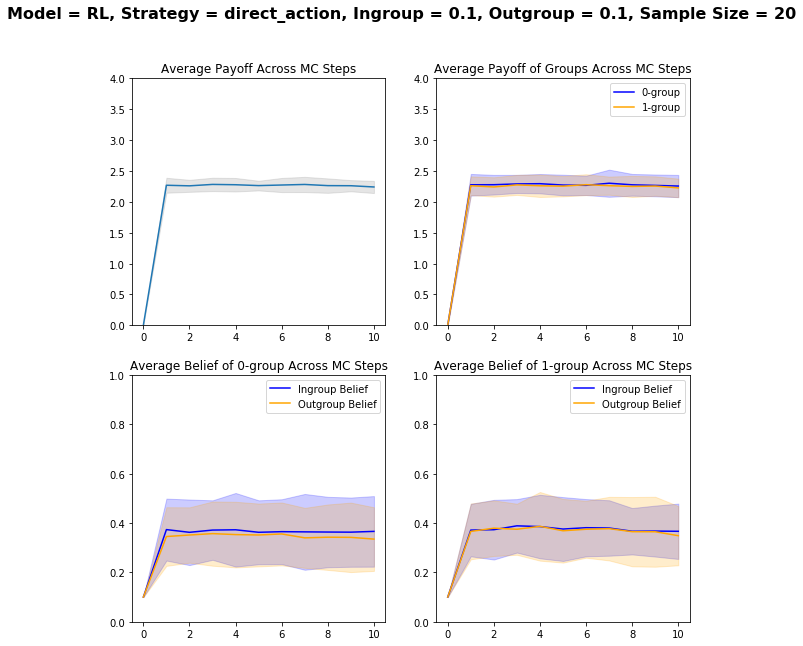

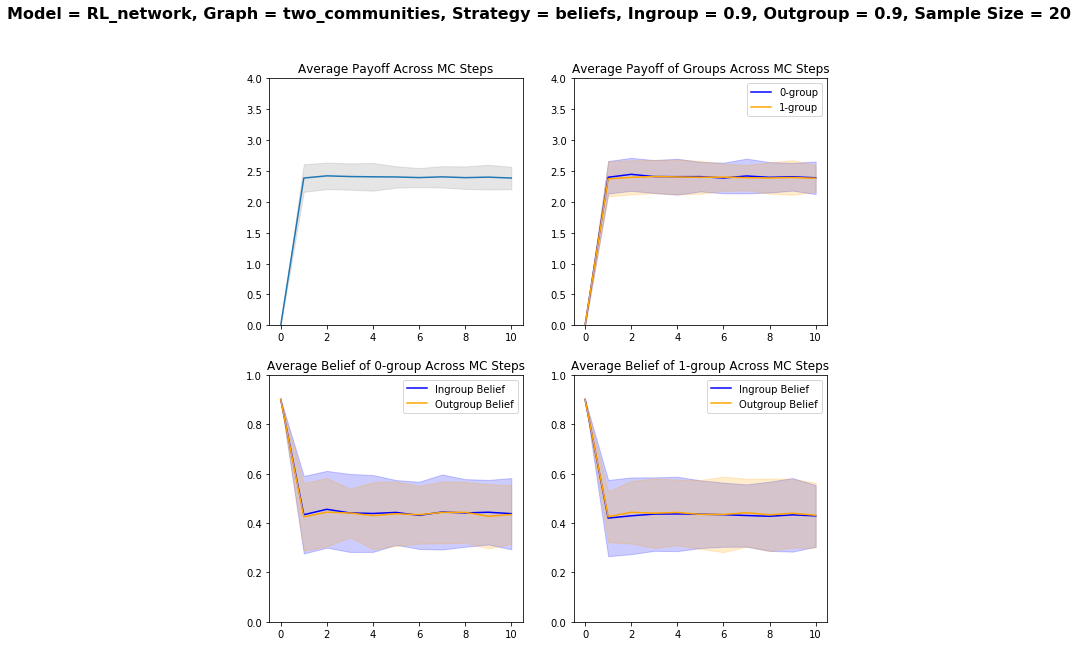

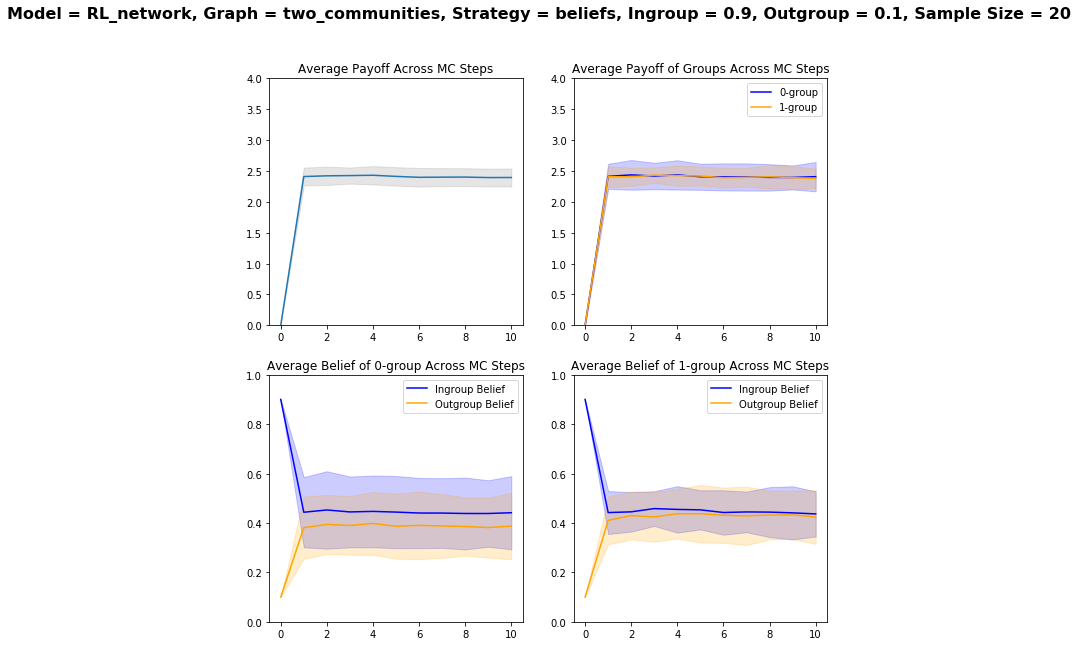

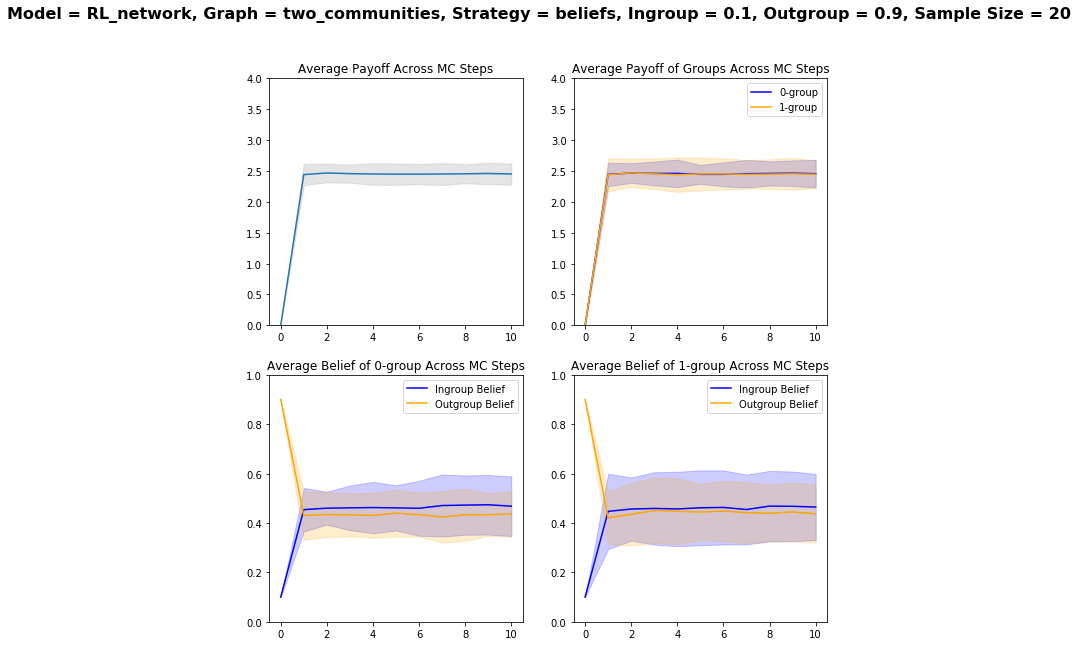

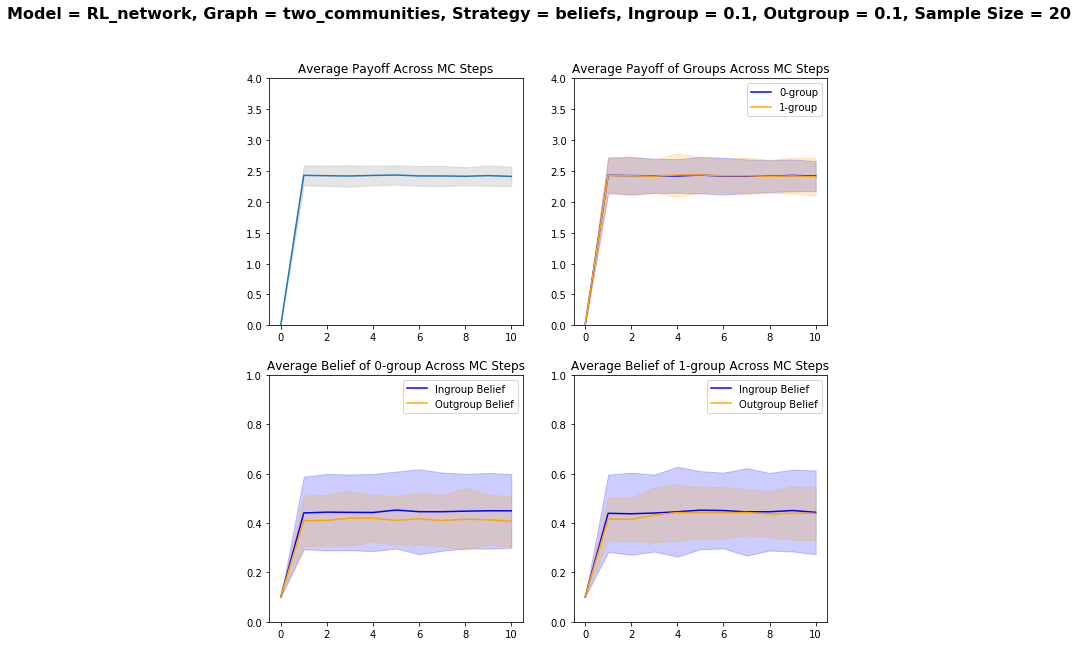

In [220]:
# Create graphs for all conditions
beliefs = [0.9,0.1]
choose_strategies = ['beliefs', 'direct_action']
network_choose_strategies = ['beliefs'] 
graph_types = ['two_communities']
network_model_types = ['RL_network']
non_network_model_types = ['RL']
x = list(range(9))

for model_type in non_network_model_types:
    for choose_strategy in choose_strategies:
        for ingroup in beliefs:
            for outgroup in beliefs:
                dataList = []
                for datafile in glob.glob('RL_results/RL results/model_{}_chooseStrategy_{}_payoffSep_small_ingroup_{}_outgroup_{}_*.csv'.format(model_type, choose_strategy, ingroup, outgroup)):
                    dataList.append(pd.read_csv(datafile))

                # Setup data frame, remove repeated timesteps and set timesteps as row names.
                df = pd.concat(dataList, axis=1, keys = range(len(dataList)))
                df.index = df. iloc[:, 0]
                df = df.loc[:, pd.IndexSlice[:, 'P0':'O99']]
                df = df.rename_axis('T')
                row = []
                for _ in range(len(dataList)):
                    for i in range(100):
                        row.append(0)
                    for i in range(100):
                        row.append(ingroup)
                    for i in range(100):
                        row.append(outgroup)
                df.loc[0] = row  # adding a row
                df.sort_index(inplace=True) 
                    
                
                mean_across_MC_steps_payoff, sd_across_MC_steps_payoff = mc_mean_sd(df, 'P0', 'P99')
                lower_bound_payoff = mean_across_MC_steps_payoff - 1.96*sd_across_MC_steps_payoff
                upper_bound_payoff = mean_across_MC_steps_payoff + 1.96*sd_across_MC_steps_payoff

                mean_across_MC_steps_0_payoff, sd_across_MC_steps_0_payoff = mc_mean_sd(df, 'P0', 'P49')
                lower_bound_payoff0 = mean_across_MC_steps_0_payoff - 1.96*sd_across_MC_steps_0_payoff
                upper_bound_payoff0 = mean_across_MC_steps_0_payoff + 1.96*sd_across_MC_steps_0_payoff
                mean_across_MC_steps_1_payoff, sd_across_MC_steps_1_payoff = mc_mean_sd(df, 'P50', 'P99')
                lower_bound_payoff1 = mean_across_MC_steps_1_payoff - 1.96*sd_across_MC_steps_1_payoff
                upper_bound_payoff1 = mean_across_MC_steps_1_payoff + 1.96*sd_across_MC_steps_1_payoff

                mean_across_MC_steps_0_ingroup, sd_across_MC_steps_0_ingroup = mc_mean_sd(df, 'I0', 'I49')
                lower_bound_ingroup0 = mean_across_MC_steps_0_ingroup - 1.96*sd_across_MC_steps_0_ingroup
                upper_bound_ingroup0 = mean_across_MC_steps_0_ingroup + 1.96*sd_across_MC_steps_0_ingroup
                
                mean_across_MC_steps_1_ingroup, sd_across_MC_steps_1_ingroup = mc_mean_sd(df, 'I50', 'I99')
                lower_bound_ingroup1 = mean_across_MC_steps_1_ingroup - 1.96*sd_across_MC_steps_1_ingroup
                upper_bound_ingroup1 = mean_across_MC_steps_1_ingroup + 1.96*sd_across_MC_steps_1_ingroup

                mean_across_MC_steps_0_outgroup, sd_across_MC_steps_0_outgroup = mc_mean_sd(df, 'O0', 'O49')
                lower_bound_outgroup0 = mean_across_MC_steps_0_outgroup - 1.96*sd_across_MC_steps_0_outgroup
                upper_bound_outgroup0 = mean_across_MC_steps_0_outgroup + 1.96*sd_across_MC_steps_0_outgroup
                mean_across_MC_steps_1_outgroup, sd_across_MC_steps_1_outgroup = mc_mean_sd(df, 'O50', 'O99')
                lower_bound_outgroup1 = mean_across_MC_steps_1_outgroup - 1.96*sd_across_MC_steps_1_outgroup
                upper_bound_outgroup1 = mean_across_MC_steps_1_outgroup + 1.96*sd_across_MC_steps_1_outgroup
                
                T = list(range(len(lower_bound_payoff)))
                
                fig, axs = plt.subplots(2, 2, figsize=(10,10))
                fig.suptitle("Model = {}, Strategy = {}, Ingroup = {}, Outgroup = {}, Sample Size = {}".format(model_type, choose_strategy, ingroup, outgroup, len(dataList)), fontsize=16, fontweight="bold")
                
                axs[0, 0].plot(T, mean_across_MC_steps_payoff)
                axs[0, 0].fill_between(T, lower_bound_payoff, upper_bound_payoff, color='gray', alpha=0.2)
                #axs[0, 0].set_xlabel("Simulation Time")
                #axs[0, 0].set_ylabel("Average Payoff")
                axs[0,0].set_ylim(0,4)
                axs[0, 0].set_title("Average Payoff Across MC Steps")
                
                axs[0, 1].plot(T, mean_across_MC_steps_0_payoff, label="0-group", color='blue')
                axs[0, 1].plot(T, mean_across_MC_steps_1_payoff, label="1-group", color='orange')
                axs[0, 1].fill_between(T, lower_bound_payoff0, upper_bound_payoff0, color='blue', alpha=0.2)
                axs[0, 1].fill_between(T, lower_bound_payoff1, upper_bound_payoff1, color='orange', alpha=0.2)
                #axs[0, 1].xlabel("Simulation Time")
                #axs[0, 1].ylabel("Average Payoff")
                axs[0, 1].set_title("Average Payoff of Groups Across MC Steps")
                axs[0, 1].set_ylim(0,4)
                axs[0, 1].legend()

                
                axs[1, 0].plot(T, mean_across_MC_steps_0_ingroup, label="Ingroup Belief", color='blue')
                axs[1, 0].plot(T, mean_across_MC_steps_0_outgroup, label="Outgroup Belief", color='orange')
                axs[1, 0].fill_between(T, lower_bound_ingroup0, upper_bound_ingroup0, color='blue', alpha=0.2)
                axs[1, 0].fill_between(T, lower_bound_outgroup0, upper_bound_outgroup0, color='orange', alpha=0.2)
                axs[1, 0].legend()
                #axs[1, 0].xlabel("Simulation Time")
                #axs[1, 0].ylabel("Average Belief")
                axs[1,0].set_ylim(0,1)
                axs[1, 0].set_title("Average Belief of 0-group Across MC Steps")

                axs[1, 1].plot(T, mean_across_MC_steps_1_ingroup, label="Ingroup Belief", color='blue')
                axs[1, 1].plot(T, mean_across_MC_steps_1_outgroup, label="Outgroup Belief", color='orange')
                axs[1, 1].fill_between(T, lower_bound_ingroup1, upper_bound_ingroup1, color='blue', alpha=0.2)
                axs[1, 1].fill_between(T, lower_bound_outgroup1, upper_bound_outgroup1, color='orange', alpha=0.2)
                axs[1, 1].legend()
                #axs[1, 1].xlabel("Simulation Time")
                #axs[1, 1].ylabel("Average Belief")
                axs[1,1].set_ylim(0,1)
                axs[1, 1].set_title("Average Belief of 1-group Across MC Steps")
                
                fig.savefig('model_{}_chooseStrategy_{}_payoffSep_small_ingroup_{}_outgroup_{}.png'.format(model_type, choose_strategy, ingroup, outgroup))
      
for model_type in network_model_types:
    for graph_type in graph_types:
        for choose_strategy in network_choose_strategies:
            for ingroup in beliefs:
                for outgroup in beliefs:
                    dataList = []
                    for datafile in glob.glob('RL_results/RL results/model_{}_graph_{}_chooseStrategy_{}_payoffSep_small_ingroup_{}_outgroup_{}_*.csv'.format(model_type, graph_type, choose_strategy, ingroup, outgroup)):
                        dataList.append(pd.read_csv(datafile))
                        
                    # Setup data frame, remove repeated timesteps and set timesteps as row names.
                    df = pd.concat(dataList, axis=1, keys = range(len(dataList)))
                    df.index = df. iloc[:, 0]
                    df = df.loc[:, pd.IndexSlice[:, 'P0':'O99']]
                    df = df.rename_axis('T')
                    row = []
                    for _ in range(len(dataList)):
                        for i in range(100):
                            row.append(0)
                        for i in range(100):
                            row.append(ingroup)
                        for i in range(100):
                            row.append(outgroup)
                    df.loc[0] = row  # adding a row
                    df.sort_index(inplace=True) 


                    mean_across_MC_steps_payoff, sd_across_MC_steps_payoff = mc_mean_sd(df, 'P0', 'P99')
                    lower_bound_payoff = mean_across_MC_steps_payoff - 1.96*sd_across_MC_steps_payoff
                    upper_bound_payoff = mean_across_MC_steps_payoff + 1.96*sd_across_MC_steps_payoff

                    mean_across_MC_steps_0_payoff, sd_across_MC_steps_0_payoff = mc_mean_sd(df, 'P0', 'P49')
                    lower_bound_payoff0 = mean_across_MC_steps_0_payoff - 1.96*sd_across_MC_steps_0_payoff
                    upper_bound_payoff0 = mean_across_MC_steps_0_payoff + 1.96*sd_across_MC_steps_0_payoff
                    mean_across_MC_steps_1_payoff, sd_across_MC_steps_1_payoff = mc_mean_sd(df, 'P50', 'P99')
                    lower_bound_payoff1 = mean_across_MC_steps_1_payoff - 1.96*sd_across_MC_steps_1_payoff
                    upper_bound_payoff1 = mean_across_MC_steps_1_payoff + 1.96*sd_across_MC_steps_1_payoff

                    mean_across_MC_steps_0_ingroup, sd_across_MC_steps_0_ingroup = mc_mean_sd(df, 'I0', 'I49')
                    lower_bound_ingroup0 = mean_across_MC_steps_0_ingroup - 1.96*sd_across_MC_steps_0_ingroup
                    upper_bound_ingroup0 = mean_across_MC_steps_0_ingroup + 1.96*sd_across_MC_steps_0_ingroup

                    mean_across_MC_steps_1_ingroup, sd_across_MC_steps_1_ingroup = mc_mean_sd(df, 'I50', 'I99')
                    lower_bound_ingroup1 = mean_across_MC_steps_1_ingroup - 1.96*sd_across_MC_steps_1_ingroup
                    upper_bound_ingroup1 = mean_across_MC_steps_1_ingroup + 1.96*sd_across_MC_steps_1_ingroup

                    mean_across_MC_steps_0_outgroup, sd_across_MC_steps_0_outgroup = mc_mean_sd(df, 'O0', 'O49')
                    lower_bound_outgroup0 = mean_across_MC_steps_0_outgroup - 1.96*sd_across_MC_steps_0_outgroup
                    upper_bound_outgroup0 = mean_across_MC_steps_0_outgroup + 1.96*sd_across_MC_steps_0_outgroup
                    mean_across_MC_steps_1_outgroup, sd_across_MC_steps_1_outgroup = mc_mean_sd(df, 'O50', 'O99')
                    lower_bound_outgroup1 = mean_across_MC_steps_1_outgroup - 1.96*sd_across_MC_steps_1_outgroup
                    upper_bound_outgroup1 = mean_across_MC_steps_1_outgroup + 1.96*sd_across_MC_steps_1_outgroup

                    T = list(range(len(lower_bound_payoff)))

                    fig, axs = plt.subplots(2, 2, figsize=(10,10))
                    fig.suptitle("Model = {}, Graph = {}, Strategy = {}, Ingroup = {}, Outgroup = {}, Sample Size = {}".format(model_type, graph_type, choose_strategy, ingroup, outgroup, len(dataList)), fontsize=16, fontweight="bold")

                    axs[0, 0].plot(T, mean_across_MC_steps_payoff)
                    axs[0, 0].fill_between(T, lower_bound_payoff, upper_bound_payoff, color='gray', alpha=0.2)
                    #axs[0, 0].set_xlabel("Simulation Time")
                    #axs[0, 0].set_ylabel("Average Payoff")
                    axs[0,0].set_ylim(0,4)
                    axs[0, 0].set_title("Average Payoff Across MC Steps")

                    axs[0, 1].plot(T, mean_across_MC_steps_0_payoff, label="0-group", color='blue')
                    axs[0, 1].plot(T, mean_across_MC_steps_1_payoff, label="1-group", color='orange')
                    axs[0, 1].fill_between(T, lower_bound_payoff0, upper_bound_payoff0, color='blue', alpha=0.2)
                    axs[0, 1].fill_between(T, lower_bound_payoff1, upper_bound_payoff1, color='orange', alpha=0.2)
                    #axs[0, 1].xlabel("Simulation Time")
                    #axs[0, 1].ylabel("Average Payoff")
                    axs[0, 1].set_title("Average Payoff of Groups Across MC Steps")
                    axs[0, 1].set_ylim(0,4)
                    axs[0, 1].legend()


                    axs[1, 0].plot(T, mean_across_MC_steps_0_ingroup, label="Ingroup Belief", color='blue')
                    axs[1, 0].plot(T, mean_across_MC_steps_0_outgroup, label="Outgroup Belief", color='orange')
                    axs[1, 0].fill_between(T, lower_bound_ingroup0, upper_bound_ingroup0, color='blue', alpha=0.2)
                    axs[1, 0].fill_between(T, lower_bound_outgroup0, upper_bound_outgroup0, color='orange', alpha=0.2)
                    axs[1, 0].legend()
                    #axs[1, 0].xlabel("Simulation Time")
                    #axs[1, 0].ylabel("Average Belief")
                    axs[1,0].set_ylim(0,1)
                    axs[1, 0].set_title("Average Belief of 0-group Across MC Steps")

                    axs[1, 1].plot(T, mean_across_MC_steps_1_ingroup, label="Ingroup Belief", color='blue')
                    axs[1, 1].plot(T, mean_across_MC_steps_1_outgroup, label="Outgroup Belief", color='orange')
                    axs[1, 1].fill_between(T, lower_bound_ingroup1, upper_bound_ingroup1, color='blue', alpha=0.2)
                    axs[1, 1].fill_between(T, lower_bound_outgroup1, upper_bound_outgroup1, color='orange', alpha=0.2)
                    axs[1, 1].legend()
                    #axs[1, 1].xlabel("Simulation Time")
                    #axs[1, 1].ylabel("Average Belief")
                    axs[1,1].set_ylim(0,1)
                    axs[1, 1].set_title("Average Belief of 1-group Across MC Steps")

                    fig.savefig('model_{}_graph_{}_chooseStrategy_{}_payoffSep_small_ingroup_{}_outgroup_{}.png'.format(model_type, graph_type, choose_strategy, ingroup, outgroup))
